## 🥗 Recipe Suggestor Agent 

    your last minute recipe suggestor powered by gemini
    
    


![](https://images.immediate.co.uk/production/volatile/sites/30/2020/08/chorizo-mozarella-gnocchi-bake-cropped-9ab73a3.jpg?quality=90&webp=true&resize=600,441)

In [1]:
from langgraph.graph import START,StateGraph, END
from langgraph.graph.message import add_messages

from typing import Annotated
from typing_extensions import TypedDict, List

from langchain_core.messages import HumanMessage, AIMessage

from langchain_google_genai import ChatGoogleGenerativeAI

import os
os.environ["GOOGLE_API_KEY"]="your_api_key"

In [2]:
from langchain.prompts import ChatPromptTemplate

In [3]:
class RecipeGeneratorState(TypedDict):
    messages: Annotated[List[HumanMessage | AIMessage], "The messages in the conversation"]
    available_ingredients: List[str]
    dietary_preferences:str
    meal_type:str
    cooking_time:str

In [4]:
llm=ChatGoogleGenerativeAI(model="gemini-1.5-flash")

In [5]:
recipe_prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a knowledgeable culinary assistant. Suggest recipes based on the ingredients provided: {ingredients}. Take into account the dietary preferences: {preferences} and the meal type: {meal_type}. If the user has specified a cooking time, ensure the recipes fit within that time frame. Provide a brief list of suggested recipes with cooking instructions for each."),
    ("human", "I have {ingredients} and I’m looking for a {meal_type} recipe that fits my dietary preferences: {preferences}. I have {cooking_time} minutes for cooking. Can you suggest some recipes and provide the cooking instructions?")
])

In [12]:
recipe_prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a knowledgeable culinary assistant. Suggest recipes based on the ingredients provided: {ingredients}. Take into account the dietary preferences: {preferences} and the meal type: {meal_type}. If the user has specified a cooking time, ensure the recipes fit within that time frame. Provide a brief list of suggested recipes only with the available ingredients only along with cooking instructions for each."),
    ("human", "I have {ingredients} and I’m looking for a {meal_type} recipe that fits my dietary preferences: {preferences}. I have {cooking_time} minutes for cooking. Can you suggest some recipes and provide the cooking instructions?")
])

In [13]:
def input_available_ingredients(state: RecipeGeneratorState) -> RecipeGeneratorState:
    print("Please enter your available ingredients to suggest recipe (comma-separated):")
    user_message = input("Your input: ")
    return {
        **state,
        "available_ingredients": [ingredient.strip() for ingredient in user_message.split(',')],
        "messages": state['messages'] + [HumanMessage(content=user_message)],
    }


def input_dietary_preferences(state: RecipeGeneratorState) -> RecipeGeneratorState:
    print("Please provide any dietary restrictions or preferences: ")
    user_message = input("Your input: ")
    return {
        **state,
        "dietary_preferences": user_message,
        "messages": state['messages'] + [HumanMessage(content=user_message)],
    }

def input_meal_type(state: RecipeGeneratorState) -> RecipeGeneratorState:
    print("Are you looking for breakfast, lunch, dinner, or something else: ")
    user_message = input("Your input: ")
    return {
        **state,
        "meal_type": user_message,
        "messages": state['messages'] + [HumanMessage(content=user_message)],
    }
def input_cooking_time(state: RecipeGeneratorState) -> RecipeGeneratorState:
    print("How much time do you have for cooking? ")
    user_message = input("Your input: ")
    return {
        **state,
        "cooking_time": user_message,
        "messages": state['messages'] + [HumanMessage(content=user_message)],
    }
def create_recipe(state: RecipeGeneratorState) -> RecipeGeneratorState:
    print(f"Creating an recipe based on available ingredients: {', '.join(state['available_ingredients'])}...")
    response = llm.invoke(recipe_prompt.format_messages(ingredients=" , ".join(state['available_ingredients']), preferences=state['dietary_preferences'],meal_type=state['meal_type'],cooking_time=state['cooking_time']))
    print("\nFinal Recipe Suggestions:")
    print(response.content)
    return {
        **state,
        "messages": state['messages'] + [AIMessage(content=response.content)],
        "itinerary": response.content,
    }

In [14]:
graph_builder=StateGraph(RecipeGeneratorState)

graph_builder.add_node("input_available_ingredients",input_available_ingredients)
graph_builder.add_node("input_dietary_preferences",input_dietary_preferences)
graph_builder.add_node("input_meal_type",input_meal_type)
graph_builder.add_node("input_cooking_time",input_cooking_time)
graph_builder.add_node("create_recipe",create_recipe)


graph_builder.set_entry_point("input_available_ingredients")

graph_builder.add_edge("input_available_ingredients","input_dietary_preferences")
graph_builder.add_edge("input_dietary_preferences","input_meal_type")
graph_builder.add_edge("input_meal_type","input_cooking_time")
graph_builder.add_edge("input_cooking_time","create_recipe")
graph_builder.add_edge("create_recipe",END)

graph=graph_builder.compile()

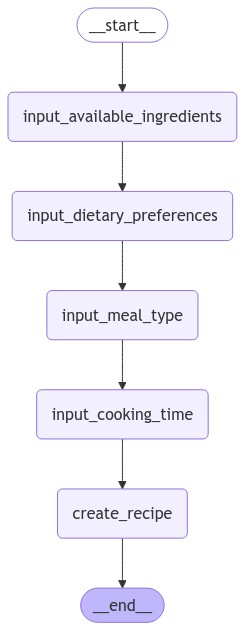

In [15]:
from IPython.display import Image, display

display(
    Image(
        graph.get_graph().draw_mermaid_png(
            
        )
    )
)

In [16]:
def run_recipe_generator(user_request: str):
    print(f"Initial Request: {user_request}\n")
    state = {
        "messages": [HumanMessage(content=user_request)],
        "available_ingredients": [],
        "dietary_preferences":"",
        "meal_type":"",
        "cooking_time":""
        }
    
    for output in graph.stream(state):
        pass  

In [18]:
user_request = "Could you please suggest me a recipe?"
run_recipe_generator(user_request)

Initial Request: Could you please suggest me a recipe?

Please enter your available ingredients to suggest recipe (comma-separated):
Your input: Bread,eggs,cheese
Please provide any dietary restrictions or preferences: 
Your input: Vegetarian
Are you looking for breakfast, lunch, dinner, or something else: 
Your input: breakfast
How much time do you have for cooking? 
Your input: 5mins
Creating an recipe based on available ingredients: Bread, eggs, cheese...

Final Recipe Suggestions:
With those ingredients and a limited time frame, here are some quick and easy breakfast options:

**1.  Cheese and Egg Toast:**

* **Instructions:**
    * Toast bread slices.
    * Crack an egg into a bowl and whisk lightly.
    * Add a slice of cheese to the toasted bread.
    * Pour the whisked egg over the cheese.
    * Microwave for 30-60 seconds, or until the egg is cooked to your liking. 

**2.  Cheesy Egg Scramble:**

* **Instructions:**
    * Scramble eggs in a bowl with a fork or whisk. 
    * He

<div style="color:black;
            display:fill;
            border-radius:15px;
            background-color:white;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:black;
               font-family: Times New Roman;
              text-align:center;'>
        IF LIKED THE NOTEBOOK, PLEASE SUPPORT BY GIVING ⭐.
    </h3>

</div>